In [ ]:
from preamble import *
%matplotlib inline

### 2.3 有监督学习算法
#### 2.3.5 决策树

In [56]:
import sys
sys.path

['C:\\Users\\t3kci\\checkout\\introduction_to_ml_with_python',
 'C:\\Users\\t3kci\\anaconda3\\python37.zip',
 'C:\\Users\\t3kci\\anaconda3\\DLLs',
 'C:\\Users\\t3kci\\anaconda3\\lib',
 'C:\\Users\\t3kci\\anaconda3',
 '',
 'C:\\Users\\t3kci\\anaconda3\\lib\\site-packages',
 'c:\\users\\t3kci\\checkout\\scikit-learn',
 'c:\\users\\t3kci\\checkout\\jupyter-book',
 'C:\\Users\\t3kci\\anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\t3kci\\anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\t3kci\\anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\t3kci\\anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\t3kci\\.ipython']

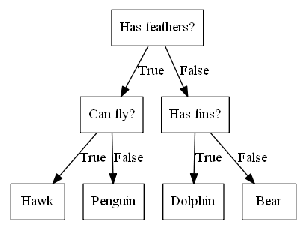

In [57]:
mglearn.plots.plot_animal_tree()

##### 1. 构造决策树

-   使用有监督学习从数据中学习决策树
-   对数据反复进行递归划分，直到划分后的每个区域 ( 决策树的每个叶结点 ) 只包含单一的目标值 ( 单一类别或者单一回归值 ) ，
那么这个叶结点就很纯粹 ( Pure )
-   决策树也可以应用于回归任务。
    -   基于每个结点的测试对树进行遍历，最终找到新数据点所属的叶结点。
    -   「新数据点」的输出为叶结点上所有训练点的平均目标值


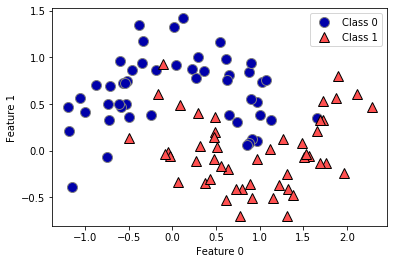

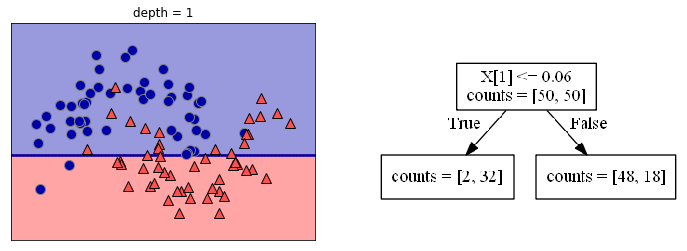

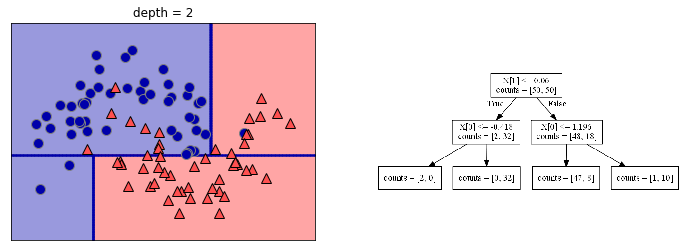

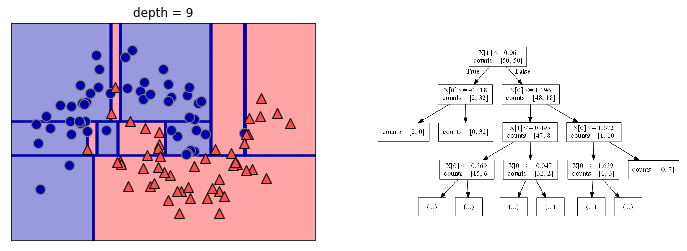

In [58]:
mglearn.plots.plot_tree_progressive()

##### 2. 控制决策树的复杂度

-   过拟合的两种策略：
    -   预剪枝 ( Pre-pruning ) ：及早停止树的生长
        -   预剪枝的限制条件：
            -   限制树的最大深度
            -   限制叶结点的最大数目
            -   规定一个结点中数据的最小数目来防止继续划分
    -   后剪枝 ( Post-pruning ) ：也叫剪枝。先构造树，随后删除或者折叠信息量较少的「结点」


In [59]:
# 使用决策树算法处理 cancer 数据集
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
# 默认 max_depth 为最大深度，模型过拟合
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [60]:
# 最优 max_depth=4
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


#### 3. 分析决策树

-   在 sklearn.tree 模块中 export_graphviz ( ) 函数提供了树的可视化方法。
-   生成的 PDF 文件中方框内的含义：
    -   第一行是数据判别的条件
    -   第二行：samples 表示样本个数
    -   第三行：`value=[25,50]` 表示正负样本的个数分别是多少


In [61]:
# 将训练得到的最优模型导出
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

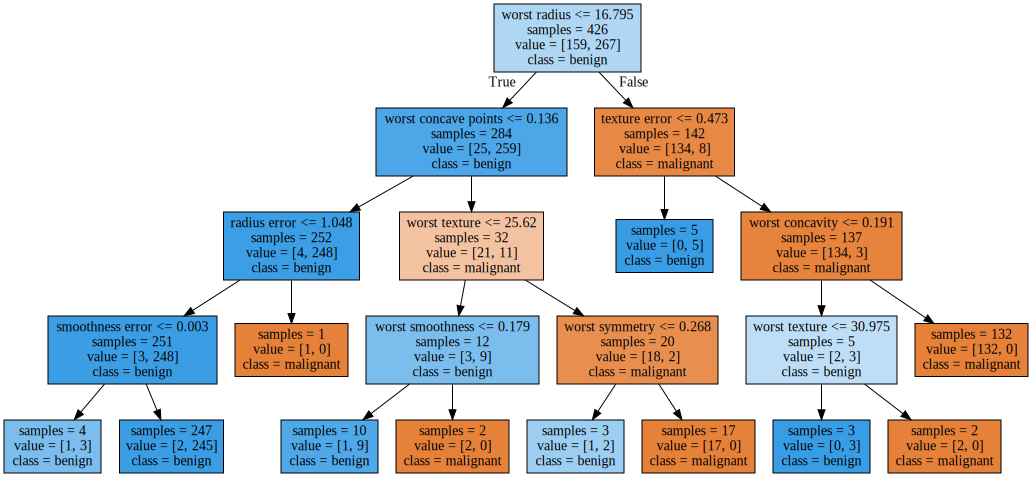

In [62]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### 4. 树的特征重要性

-   特征重要性求和为 1。
-   每个特征的重要性数值在 0 与 1 之间。


In [63]:
print("Feature importances:")
print(tree.feature_importances_)

Feature importances:
[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.01  0.048
 0.    0.    0.002 0.    0.    0.    0.    0.    0.727 0.046 0.    0.
 0.014 0.    0.018 0.122 0.012 0.   ]


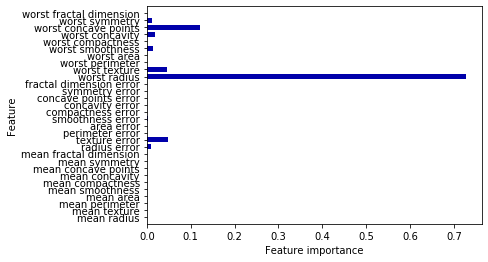

In [64]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

# 图表显示特征重要性
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


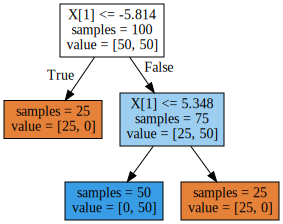

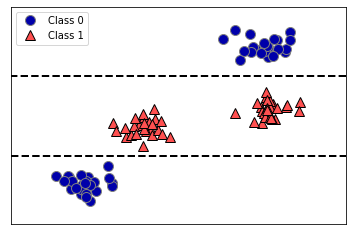

In [65]:
# 决策树学习非单调关系的数据集
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

Text(0, 0.5, 'Price in $/Mbyte')

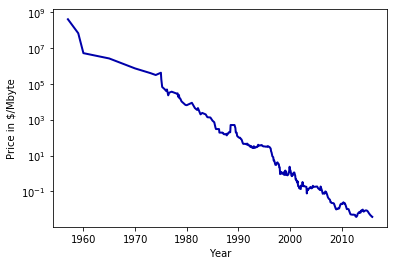

In [66]:
# 图2-31：用对数坐标绘制RAM价格的历史发展
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [67]:
# 图2-32：线性模型和回归树对RAM价格数据的预测结果对比
from sklearn.tree import DecisionTreeRegressor
# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# predict prices based on date
X_train = data_train.date[:, np.newaxis]
# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# predict on all data
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

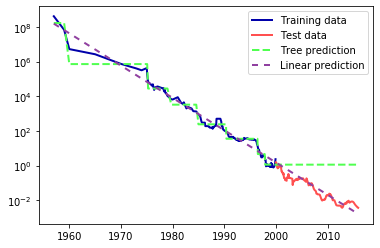

In [68]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

#### 5. 优点、缺点和参数

-   优点
    -   得到的模型容易可视化
    -   算法不受数据缩放的影响
-   缺点
    -   即使做了预剪枝，仍然容易过拟合，泛化能力较差。
    -   使用决策树集成方法来代替单棵决策树。
-   参数
    -   控制决策树模型复杂度的参数是：预剪枝参数，即选择一种预剪枝策略来防止过拟合
        -   max_depth
        -   max_leaf_nodes
        -   min_samples_leaf